In [228]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [311]:
df = pd.read_csv("val_traditional_16-22-55.csv")

In [312]:
df.head(20)

,date,type,traditional
0,2014-08-31,Breakfast,XXX Bacon; Cage Free Fried Egg; XXX Fresh Frui...
1,2014-08-31,Lunch,Apple Cranberry Chutney; Steamed Broccoli; Cag...
2,2014-08-31,Dinner,Delmonico Potatoes; Salmon; Gratin of Seasonal...
3,2014-09-01,Breakfast,XXX Bacon; French Dipped Waffles; Cage Free Fr...
4,2014-09-01,Lunch,Garlic and Herb Breadsticks; Steamed Broccoli;...
5,2014-09-01,Dinner,Beef Fajita Filling; Black Bean Frijoles; Tort...
6,2014-09-02,Breakfast,XXX Bacon; Grilled Kielbasa; Cage Free Hard Bo...
7,2014-09-02,Lunch,Asian Slaw; XXX Bulgogi (Korean BBQ Beef)
8,2014-09-02,Dinner,Grilled Flank Steak; Mediterranean Potatoes; P...
9,2014-09-03,Breakfast,XXX Bacon; French Toast; Cage Free Fried Egg; ...


In [231]:
val_sorted = df.sort_values(by='traditional')
val_sorted.describe()

,date,type,traditional
count,3525,3525,3261
unique,1175,3,940
top,2015-12-17,Dinner,Cantina Taco Bar
freq,3,1175,42


In [232]:
from scipy.spatial.distance import pdist, squareform

In [233]:
meals_only = pd.DataFrame(df['traditional'])

In [234]:
parameter_tuning = {}
dists = pdist(meals_only, fuzz.token_sort_ratio)


KeyError: 85

In [241]:
with open('dist_full.pkl','wb') as output:
    pkl.dump(dists, output)

In [247]:
with open('dist_full.pkl', 'rb') as f:
    dists = pkl.load(f)
mat = squareform(dists)
parameter_tuning['dists'] = dists
parameter_tuning['mat'] = mat
parameter_tuning['test_thresholds'] = range(40,90,5)
for i in range(40,90,5):
    thresh = buildThreshholdMatrix(mat, i)
    groups = categorizeIntoClusters(thresh)
    num = len(groups)
    parameter_tuning[i] = {}
    parameter_tuning[i]['thresh'] = thresh
    parameter_tuning[i]['groups'] = groups
    parameter_tuning[i]['num'] = num
    print('Tuned for threshold: {}, with groups: {}'.format(i, num))


Tuned for threshold: 40, with groups: 3
Tuned for threshold: 45, with groups: 4
Tuned for threshold: 50, with groups: 7
Tuned for threshold: 55, with groups: 10
Tuned for threshold: 60, with groups: 19
Tuned for threshold: 65, with groups: 57
Tuned for threshold: 70, with groups: 84
Tuned for threshold: 75, with groups: 109
Tuned for threshold: 80, with groups: 134
Tuned for threshold: 85, with groups: 181


In [248]:
with open('parameter_tuning.pkl','wb') as file:
    pkl.dump(parameter_tuning, file)

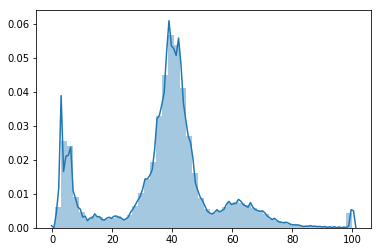

In [249]:
sns.distplot(dists)
plt.show()

In [69]:
# dists = pdist(meals_only, fuzz.token_sort_ratio)

import pickle as pkl
with open('val_dists_try1.pkl', 'rb') as f:
    dists = pkl.load(f)


In [325]:
def cluster_label(df, group, thresh):
    cluster = 'cluster_t{}'.format(thresh)
    print(cluster)
    df[cluster] = 0
    for i in range(len(group)):
        for j in range(len(group[i])):
            df.loc[group[i][j],cluster] = i
    return df

In [304]:
len(parameter_tuning[40]['groups'])

3

In [318]:
len(parameter_tuning[65]['groups'])

57

In [326]:
df_try = df.copy()


cluster_t40
cluster_t45
cluster_t50
cluster_t55
cluster_t60
cluster_t65
cluster_t70
cluster_t75
cluster_t80
cluster_t85


In [327]:
df_try.head()

,date,type,traditional,cluster_t40,cluster_t45,cluster_t50,cluster_t55,cluster_t60,cluster_t65,cluster_t70,cluster_t75,cluster_t80,cluster_t85
0,2014-08-31,Breakfast,XXX Bacon; Cage Free Fried Egg; XXX Fresh Frui...,0,0,0,0,0,0,0,0,1,1
1,2014-08-31,Lunch,Apple Cranberry Chutney; Steamed Broccoli; Cag...,0,0,0,0,0,0,0,0,47,79
2,2014-08-31,Dinner,Delmonico Potatoes; Salmon; Gratin of Seasonal...,0,0,0,0,0,18,13,9,8,20
3,2014-09-01,Breakfast,XXX Bacon; French Dipped Waffles; Cage Free Fr...,0,0,0,0,0,0,0,0,1,1
4,2014-09-01,Lunch,Garlic and Herb Breadsticks; Steamed Broccoli;...,0,0,0,0,0,23,24,22,22,125


In [348]:
df2 = df_try.replace(np.nan, '', regex = True)
df5 = tag_df(df2, 'cluster_t65')
df5 = tag_df(df5, 'cluster_t70')
df5 = tag_df(df5, 'cluster_t75')
with open('val_clustered.csv', 'w+') as file:
    df5.to_csv(file)

common
cage           3021
free           3021
egg;           1777
scrambled      1302
bacon;         1240
hard           1236
boiled         1236
eggs;          1159
uncured         976
potatoes;       774
fried           719
french          706
pancakes;       667
rolled          620
maine           620
hot             606
grain           606
ancient         606
cereal;         547
breakfast       536
toast;          517
turkey          471
sausage         469
oats            446
sausage;        413
scramble;       406
fresh           382
pork            376
grilled         342
and             325
               ... 
mac               1
baasto            1
hawker            1
bergedil;         1
guinness;         1
plantains;        1
macarrones        1
ful               1
bhajia;           1
chophouse         1
kielbasa          1
avocado;          1
fish              1
san               1
seasonal          1
nettle            1
harvest           1
emerald           1
fillet;      

/Users/Alex/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



hot              250
burger;          136
hamburger        128
beef             125
all              125
dog              125
french           125
dog;             124
brioche          123
roll;            123
american         112
white            112
cheese;          112
rolls;            87
baked             76
beans;            76
vegetarian        76
fries;            66
fries             61
cheeseburger;     43
rolls             38
onion             35
bacon             28
bacon;            26
uncured           24
rings             23
xxx               21
rings;            12
vegetable          7
garden             7
steamed            6
beans              4
bun;               4
chicken            4
green              3
snow               3
peas;              3
breast;            3
grilled            3
boco               2
veggie             2
vegan              2
steak              2
soy                2
soft               1
autumn             1
hamburger;         1
of          

33     6
5      6
42     5
2      2
46     2
38     2
6      2
35     2
16     2
144    1
3      1
4      1
10     1
11     1
127    1
80     1
58     1
36     1
37     1
40     1
41     1
51     1
1      1
dtype: int64
sorted
1      1
2      2
3      1
4      1
5      6
6      2
10     1
11     1
16     2
33     6
35     2
36     1
37     1
38     2
40     1
41     1
42     5
46     2
51     1
58     1
80     1
127    1
144    1
dtype: int64
common
grilled     66
and         58
cheese;     49
vermont     45
tomato;     45
cheddar     45
monster     38
green       38
southern    37
slam;       37
chips       34
cape        31
cod         31
kettle      31
ham         13
on          13
swiss       13
rye;        10
fries       10
tomato       8
basil        8
bisque;      7
french       7
potato       6
sweet        4
cheese       4
rye          3
house        2
made         2
bisque       1
tortilla     1
dtype: int64
counts
31    3
13    3
45    3
8     2
4     2
37    2
38    2
7    

counts
3     7
40    5
42    4
24    2
5     2
9     2
6     2
35    2
30    1
51    1
37    1
dtype: int64
sorted
3     7
5     2
6     2
9     2
24    2
30    1
35    2
37    1
40    5
42    4
51    1
dtype: int64
common
cantina    42
bar        42
taco       42
dtype: int64
counts
42    3
dtype: int64
sorted
42    3
dtype: int64
common
blackened     42
catfish;      42
creole        41
chicken;      41
jambalaya;    35
choux         27
corn          27
maque         27
steamed       15
summer         8
squash         8
rice           7
pilaf          7
broccoli;      7
dtype: int64
counts
27    3
7     3
42    2
41    2
8     2
15    1
35    1
dtype: int64
sorted
7     3
8     2
15    1
27    3
35    1
41    2
42    2
dtype: int64
common
pulled          59
potato          52
sweet           51
chicken;        48
roll;           46
water           46
pork;           44
southwestern    41
fries           35
cole            33
slaw;           31
baccia          26
la              26
ro

dtype: int64
sorted
1     9
2     4
3     3
6     4
7     4
10    5
12    1
14    2
16    1
17    1
18    1
19    1
20    1
23    1
25    2
33    2
45    1
dtype: int64
common
chimichurri      58
sauce;           58
verde            29
grilled          29
steak;           29
flank            29
rojo             29
mediterranean    28
potatoes;        28
valencia;        28
paella           28
carrots          23
honey            23
roasted          23
beans             5
steamed           5
green             5
masala;           1
tikka             1
basmati           1
chicken           1
with              1
spinach           1
dtype: int64
counts
1     6
29    5
28    4
23    3
5     3
58    2
dtype: int64
sorted
1     6
5     3
23    3
28    4
29    5
58    2
dtype: int64
common
roasted         51
potato          30
scalloped       30
ribs;           29
beef            29
ale             29
braised         29
short           29
lavender        21
chicken;        21
honey           21

dtype: int64
sorted
3    7
6    2
dtype: int64
common
green       3
lentils;    3
rice        3
beans;      3
and         3
with        3
berbere     3
potato      3
vegan       3
lamb        3
brown       3
steamed     3
chicken     3
pilaf       3
sugo;       3
dtype: int64
counts
3    15
dtype: int64
sorted
3    15
dtype: int64
common
burger         6
with           4
southwest      3
avocado;       3
chicken        3
w/avocado;     3
quinoa         3
bean           3
black          3
salad          1
french         1
cod            1
fries          1
kettle         1
chips          1
freekeh        1
pomegranate    1
spiral         1
cape           1
dtype: int64
counts
1    10
3     7
6     1
4     1
dtype: int64
sorted
1    10
3     7
4     1
6     1
dtype: int64
common
peruvian    6
in          3
leg         3
sugar       3
chicken     3
aji;        3
steamed     3
peas        3
lamb        3
apples;     3
rice;       3
of          3
with        3
and         3
roast       3
cid

1      6
4      1
6      1
12     1
34     1
38     1
50     2
52     6
98     1
104    1
dtype: int64
common
sausage       91
patty;        90
chicken       80
sandwich;     55
tater         50
mccharlie     50
sausage);     50
(no           50
egg           50
tots          49
tenders;      48
turkey        47
pork          44
breakfast     44
charlie's     41
seeded        31
roll;         29
steak         27
steakhouse    27
fries         26
dressing;     10
buttermilk    10
bacon;         9
xxx            9
chicken;       9
uncured        8
sandwich       4
fries;         4
french         3
wrap;          3
burger         3
val            3
hamburger      2
bun;           2
patty          1
tots;          1
dtype: int64
counts
50    5
3     4
9     3
1     2
2     2
4     2
44    2
10    2
27    2
90    1
8     1
80    1
55    1
91    1
31    1
41    1
26    1
47    1
48    1
49    1
29    1
dtype: int64
sorted
1     2
2     2
3     4
4     2
8     1
9     3
10    2
26    1
27    

counts
42    4
1     3
44    2
9     2
39    2
34    2
30    1
10    1
2     1
14    1
11    1
5     1
dtype: int64
sorted
1     3
2     1
5     1
9     2
10    1
11    1
14    1
30    1
34    2
39    2
42    4
44    2
dtype: int64
common
roasted         119
with             60
steamed          53
broccoli         46
mashed           43
red              43
southern         41
fried            41
sirloin          41
tips             41
mushrooms;       41
potato;          39
chicken;         37
cauliflower;     33
chicken          23
and              19
lemon            19
thyme;           19
rosemary         17
potatoes;        13
leg              13
lamb;            13
&                13
garlic           13
roast            13
of               13
broccoli;         8
florets           6
steak;            6
grilled           6
flank             6
peas              5
carrots;          5
steamed;          4
potatoes          4
potato            4
fresh             4
calico            1
p

counts
7     5
31    3
13    2
12    2
42    2
24    1
19    1
48    1
6     1
36    1
dtype: int64
sorted
6     1
7     5
12    2
13    2
19    1
24    1
31    3
36    1
42    2
48    1
dtype: int64
common
torta;       34
chicken      30
mole         30
cuban        29
corn         29
blue         29
tortilla     29
sandwich;    25
chips        25
yuca         14
fries;       13
sandwich      4
black         4
chips;        4
bean          4
fries         1
dtype: int64
counts
29    4
4     4
30    2
25    2
14    1
13    1
34    1
1     1
dtype: int64
sorted
1     1
4     4
13    1
14    1
25    2
29    4
30    2
34    1
dtype: int64
common
new           49
roasted       30
butter;       29
parsley       29
in            29
potatoes      29
beets;        29
sugar         28
steamed       28
snap          28
peas          23
haddock;      20
england       20
baked         20
fire          17
brisket;      17
slow          17
yankee         8
pot            8
roast          5
peas;    

1     4
2     1
9     3
11    1
13    3
17    2
21    1
22    2
dtype: int64
common
roasted          24
relish;          18
mediterranean    18
olive            18
steak;           18
flat             18
iron             18
seared           18
salmon;          18
grilled          18
potatoes         18
rosemary         18
snap             17
steamed          17
peas;            17
sugar            17
beets;            6
broccolini;       1
dtype: int64
counts
18    11
17     4
24     1
6      1
1      1
dtype: int64
sorted
1      1
6      1
17     4
18    11
24     1
dtype: int64
common
bar       17
noodle    17
dtype: int64
counts
17    2
dtype: int64
sorted
17    2
dtype: int64
common
and       11
"dawgs    11
spuds"    11
dtype: int64
counts
11    3
dtype: int64
sorted
11    3
dtype: int64
common
sauce;          16
cage            11
free            11
toast;           9
pancake          9
uncured          9
manicotti;       9
sweet            9
cheese           9
scrambled        9

dtype: int64
counts
4    25
dtype: int64
sorted
4    25
dtype: int64
common
asparagus;    3
bourbon       3
mashed        3
chutney;      3
potatoes;     3
roast         3
sauce         3
roasted       3
peaches;      3
turkey;       3
cider         3
grilled       3
cranberry     3
of            3
mill          3
bbq           3
and           3
apple         3
pork          3
squash        3
breast        3
chop;         3
pasta;        1
cajun         1
chicken       1
dtype: int64
counts
3    22
1     3
dtype: int64
sorted
1     3
3    22
dtype: int64
common
wrap            27
xxx             24
vegetable       18
turkey          18
roasted         18
club            15
wrap;            9
jalapeno;        6
garlic;          6
basil;           6
tomato           6
whole            6
herb             6
chips;           3
wheat            3
spinach;         3
wheat;           3
cod              3
club/spinach     3
kettle           3
cape             3
dtype: int64
counts
3     8
6    

sorted
2    11
3     4
dtype: int64
common
free           2985
cage           2985
egg;           1765
scrambled      1278
hard           1226
boiled         1226
bacon;         1226
eggs;          1145
uncured         958
potatoes;       769
fried           719
french          698
pancakes;       665
maine           614
rolled          614
grain           602
ancient         600
hot             600
cereal;         541
breakfast       522
toast;          509
turkey          470
sausage         451
oats            446
sausage;        409
scramble;       406
fresh           375
pork            362
grilled         348
and             319
               ... 
mississippi       1
chophouse         1
collard           1
bun               1
bhajia;           1
ful               1
egg               1
captain;          1
sofrito;          1
mexican           1
horseradish       1
foster;           1
peas              1
guacamole;        1
triple            1
bean              1
cantina          

2     1
4     1
7     2
31    2
36    1
38    4
41    6
45    6
dtype: int64
common
salmon;        43
delmonico      43
of             42
seasonal       42
vegetables;    42
gratin         42
steak;         38
potatoes       38
new            33
york           33
sirloin        29
steak          13
grilled        11
flank          10
sauce;          8
vals            8
potatoes;       5
seared          1
dtype: int64
counts
42    4
43    2
8     2
38    2
33    2
29    1
10    1
1     1
13    1
5     1
11    1
dtype: int64
sorted
1     1
5     1
8     2
10    1
11    1
13    1
29    1
33    2
38    2
42    4
43    2
dtype: int64
common
tartar       45
cole         44
slaw;        44
chop         44
american     44
new          43
england      43
fry;         42
fish         42
steamed      41
baby         41
carrots;     39
fries;       37
sauce;       34
steak        33
suey         23
suey;        21
sauce        11
french        9
xxx           8
fries         5
quintet       4
of  

1     1
4     4
13    1
14    1
25    2
29    4
30    2
34    1
dtype: int64
common
chimichurri      56
sauce;           56
steak;           28
grilled          28
flank            28
verde            28
valencia;        28
potatoes;        28
paella           28
mediterranean    28
rojo             28
roasted          23
carrots          23
honey            23
steamed           5
beans             5
green             5
dtype: int64
counts
28    9
23    3
5     3
56    2
dtype: int64
sorted
5     3
23    3
28    9
56    2
dtype: int64
common
rice;          51
chicken        28
vegetable      28
curry;         28
spring         28
duck           28
and            28
green          28
roll;          28
jasmine        28
vegetables;    28
scallion       28
emerald        28
shrimp         27
fried          27
sauce          24
sauce;          4
rice            4
dtype: int64
counts
28    12
27     2
4      2
24     1
51     1
dtype: int64
sorted
4      2
24     1
27     2
28    12
51     

1     10
2      3
3     11
4      1
5      1
6      2
7      1
12     3
14     2
17     2
18     3
19     3
20     2
22     3
24     1
25     2
29     1
30     1
45     1
dtype: int64
common
parmesan     36
eggplant     29
chicken      29
hoagie;      24
parmesan;    22
kettle       18
cod          18
cape         18
hoagie       12
chips;       12
green         7
beans;        7
sub;          7
steamed       7
meatball      7
chips         6
dtype: int64
counts
7     5
18    3
29    2
12    2
6     1
24    1
22    1
36    1
dtype: int64
sorted
6     1
7     5
12    2
18    3
22    1
24    1
29    2
36    1
dtype: int64
common
pulled      30
pork;       18
bbq         18
potato      18
chicken;    18
sweet       18
roll;       16
water       16
puffs       12
slaw;        6
fries        6
cole         6
dtype: int64
counts
18    5
6     3
16    2
30    1
12    1
dtype: int64
sorted
6     3
12    1
16    2
18    5
30    1
dtype: int64
common
roasted          24
relish;          18
medit

7     15
6      4
13     1
dtype: int64
sorted
6      4
7     15
13     1
dtype: int64
common
creole       7
rice         7
blackened    7
broccoli;    7
chicken;     7
steamed      7
pilaf        7
catfish;     7
dtype: int64
counts
7    8
dtype: int64
sorted
7    8
dtype: int64
common
asian       7
roll;       7
bulgogi     7
beef);      7
burger;     7
arugula;    7
xxx         7
citrus      7
slaw;       7
(korean     7
turkey      7
bbq         7
tostitos    7
aioli;      7
grain       5
whole       5
sub         4
rolls;      4
seeded      2
dtype: int64
counts
7    14
5     2
4     2
2     1
dtype: int64
sorted
2     1
4     2
5     2
7    14
dtype: int64
common
wrap;        14
buffalo       7
vegetable     7
roasted       7
ruffles       7
potato        7
chicken       7
chips         7
dtype: int64
counts
7     7
14    1
dtype: int64
sorted
7     7
14    1
dtype: int64
common
zucchini     7
in           7
bread        7
marsala;     7
chicken      7
lasagna      7
olive       

sorted
3    21
6     2
9     2
dtype: int64
common
steamed       6
burger;       6
green         3
american      3
peas;         3
french        3
cheese;       3
vegetarian    3
baked         3
snow          3
white         3
beans;        3
breast;       3
hamburger     3
bun;          3
fries;        3
beans         3
chicken       3
grilled       3
veggie        2
hot           2
rolls;        1
xxx           1
vegan         1
dog           1
beef          1
soy           1
boco          1
dog;          1
all           1
dtype: int64
counts
3    17
1     9
6     2
2     2
dtype: int64
sorted
1     9
2     2
3    17
6     2
dtype: int64
common
sauce;         5
mashed         3
cornish        3
prime          3
au             3
hen            3
rice           3
stuffing;      3
rib            3
potato;        3
squash;        3
chutney;       3
cranberry      3
with           3
grilled        3
roasted        3
apple          3
wild           3
game           3
jus;           3
butte

common
corn          9
baked         4
butter;       4
fritters;     4
cream;        2
and           2
island        2
with          2
&             2
vegan         2
aioli;        2
lobster       2
beans;        2
vegetarian    2
quinoa        2
slaw;         2
cole          2
zucchini      2
calamari;     2
sour          2
dogs;         2
the           2
chicken       2
rhode         2
fresh         2
molasses      2
potato;       2
on            2
burger        2
cob;          2
style         2
avocado       2
basil         2
muffin;       1
dtype: int64
counts
2    29
4     3
9     1
1     1
dtype: int64
sorted
1     1
2    29
4     3
9     1
dtype: int64
common
roast         4
orange        3
glazed        3
onion;        2
whipped       2
sprouts       2
turkey;       2
cipollini     2
potatoes;     2
&             2
butternut;    2
steamed       2
and           2
breast        2
cheddar       2
brussels      2
green         2
mashed        2
cranberry     2
relish;       2
gible

In [70]:
dists

array([   9.,   15.,  100., ...,   15.,   12.,   48.])

In [128]:
mat = squareform(dists)

In [72]:
##CREDIT TO erikm0111

def sumRow(matrix, i):
    return np.sum(matrix[i,:])
 
def determineRow(matrix):
    maxNumOfOnes = -1
    row = -1
    for i in range(len(matrix)):
        if maxNumOfOnes < sumRow(matrix, i):
            maxNumOfOnes = sumRow(matrix, i)
            row = i
    return row
 
def addIntoGroup(matrix, ind):
    change = True
    indexes = []
    for col in range(len(matrix)):
        if matrix[ind, col] == 1:
            indexes.append(col)
    while change == True:
        change = False
        numIndexes = len(indexes)
        for i in indexes:
            for col in range(len(matrix)):
                if matrix[i, col] == 1:
                    if col not in indexes:
                        indexes.append(col)
        numIndexes2 = len(indexes)
        if numIndexes != numIndexes2:
            change = True
    return indexes
 
def deleteChosenRowsAndCols(matrix, indexes):
    for i in indexes:
        matrix[i,:] = 0
        matrix[:,i] = 0
    return matrix
def categorizeIntoClusters(matrix):
    groups = []
    while np.sum(matrix) > 0:
        group = []
        row = determineRow(matrix)
        indexes = addIntoGroup(matrix, row)
        groups.append(indexes)
        matrix = deleteChosenRowsAndCols(matrix, indexes)
    return groups

In [127]:
len(mat)

3525

In [74]:
def buildThreshholdMatrix(prev, threshold):
	numOfSamples = len(prev)
	matrix = np.zeros(shape=(numOfSamples, numOfSamples))
	for i in range(len(matrix)):
		for j in range(len(matrix)):
			dist = prev[i,j]
			if dist > threshold:
				matrix[i,j] = 1
	return matrix

In [75]:
thresh = buildThreshholdMatrix(mat, 90)

In [76]:
thresh

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [77]:
groups = categorizeIntoClusters(thresh)

In [78]:
len(groups)

219

In [87]:
import seaborn as sns
sns.distplot(dists)

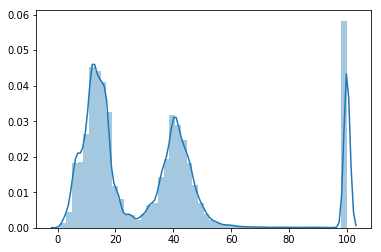

In [88]:
plt.show()

In [89]:
df['clusters'] = 0
for i in range(len(groups)):
    for j in range(len(groups[i])):
        df.loc[groups[i][j],'clusters'] = i

In [90]:
df[df['clusters'] == 216]

,date,type,traditional,clusters
3359,2017-09-23,Dinner,Cheese Calzone; Meatballs; Spaghetti; Marinara...,216
3443,2017-10-21,Dinner,Cheese Calzone; Meatballs; Spaghetti; Marinara...,216


In [91]:
calzone = df[df.traditional.str.contains('Calzone', na = False)]

In [92]:
calzone.head(20)

,date,type,traditional,clusters
1595,2016-02-13,Dinner,Cheese Calzone; Meatballs; Spaghetti; Marinara...,58
1679,2016-03-12,Dinner,Cheese Calzone; Meatballs; Spaghetti; Marinara...,58
1763,2016-04-09,Dinner,Cheese Calzone; Meatballs; Spaghetti; Marinara...,58
1847,2016-05-07,Dinner,Cheese Calzone; Meatballs; Spaghetti; Marinara...,58
2267,2016-09-24,Dinner,Cheese Calzone; Meatballs; Spaghetti; Marinara...,58
2351,2016-10-22,Dinner,Cheese Calzone; Meatballs; Spaghetti; Marinara...,58
2519,2016-12-17,Dinner,Cheese Calzone; Meatballs; Spaghetti; Marinara...,58
2624,2017-01-21,Dinner,Cheese Calzone; Meatballs; Spaghetti; Marinara...,58
2708,2017-02-18,Dinner,Cheese Calzone; Meatballs; Spaghetti; Marinara...,58
2792,2017-03-18,Dinner,Cheese Calzone; Meatballs; Spaghetti; Marinara...,58


In [93]:
print(calzone.loc[3359,'traditional'])

Cheese Calzone; Meatballs; Spaghetti; Marinara Sauce; Chicken 'Vesuvio'; Steamed Broccoli


In [94]:
print(calzone.loc[3253,'traditional'])

Calzones; Chicken Parmesan; Eggplant Parmesan; Sub Rolls; Cape Cod Kettle Chips


In [95]:
fuzz.token_set_ratio(calzone.loc[3359,'traditional'],calzone.loc[3253,'traditional'])

49

In [96]:
import utils

In [97]:
def _token_print_set(s1, s2, partial=True, force_ascii=True, full_process=True):
    """Find all alphanumeric tokens in each string...
        - treat them as a set
        - construct two strings of the form:
            <sorted_intersection><sorted_remainder>
        - take ratios of those two strings
        - controls for unordered partial matches"""

    p1 = utils.full_process(s1, force_ascii=force_ascii) if full_process else s1
    p2 = utils.full_process(s2, force_ascii=force_ascii) if full_process else s2

    if not utils.validate_string(p1):
        return 0
    if not utils.validate_string(p2):
        return 0

    # pull tokens
    tokens1 = set(p1.split())
    tokens2 = set(p2.split())

    intersection = tokens1.intersection(tokens2)
    diff1to2 = tokens1.difference(tokens2)
    diff2to1 = tokens2.difference(tokens1)
    
    print(intersection)
    print(diff1to2)
    print(diff2to1)

    sorted_sect = " ".join(sorted(intersection))
    sorted_1to2 = " ".join(sorted(diff1to2))
    sorted_2to1 = " ".join(sorted(diff2to1))

    combined_1to2 = sorted_sect + " " + sorted_1to2
    combined_2to1 = sorted_sect + " " + sorted_2to1

    # strip
    sorted_sect = sorted_sect.strip()
    combined_1to2 = combined_1to2.strip()
    combined_2to1 = combined_2to1.strip()

In [98]:
_token_print_set(calzone.loc[3359,'traditional'],calzone.loc[3253,'traditional'])

{'chicken'}
{'sauce', 'meatballs', 'calzone', 'cheese', 'vesuvio', 'marinara', 'steamed', 'spaghetti', 'broccoli'}
{'cape', 'parmesan', 'eggplant', 'sub', 'calzones', 'chips', 'cod', 'rolls', 'kettle'}


In [99]:
common = pd.Series(' '.join(calzone['traditional']).lower().split()).value_counts()

In [280]:
common
counts = common.value_counts()
common

cheese        13
calzone;      13
sauce;        13
meatballs;    13
marinara      13
broccoli      13
spaghetti;    13
steamed       13
parmesan;     12
chicken        8
calzones;      6
eggplant       6
sub            6
cape           6
rolls;         6
cod            6
kettle         6
chips          6
'vesuvio';     2
hot            1
italian        1
sausage        1
link;          1
dtype: int64

In [279]:
sorted= counts.sort_index()
sorted

1     4
2     1
6     8
8     1
12    1
13    8
dtype: int64

In [285]:
index = sorted.iloc[-1]
index

8

In [282]:
sorted.index[-1]

13

In [104]:
common[common == 13].index.values

array(['cheese', 'calzone;', 'sauce;', 'meatballs;', 'marinara',
       'broccoli', 'spaghetti;', 'steamed'], dtype=object)

In [ ]:
gr

In [106]:
getTop(pd.Series(' '.join(calzone['traditional']).lower().split()), 4)

[13]
13


'cheese calzone; sauce; meatballs; marinara broccoli spaghetti; steamed'

In [107]:
df['abbrev_name'] = ''

In [108]:
df_copy = df

In [110]:
df.head()

,date,type,traditional,clusters,abbrev_name
0,2014-08-31,Breakfast,breakfast,0,
1,2014-08-31,Lunch,Apple Cranberry Chutney; Steamed Broccoli; Cag...,72,
2,2014-08-31,Dinner,Delmonico Potatoes; Salmon; Gratin of Seasonal...,23,
3,2014-09-01,Breakfast,breakfast,0,
4,2014-09-01,Lunch,Garlic and Herb Breadsticks; Steamed Broccoli;...,145,


In [191]:
df = df.replace(np.nan, '', regex = True)

In [114]:
groups = df_copy.groupby('clusters2')

In [335]:
groups = df5.groupby('cluster_t75')
group = groups.get_group(12)

In [345]:
def getTop(series, min):
    common = series.value_counts()
    counts = common.value_counts()
    sorted = counts.sort_index()
    num = 0
    counts = []
    end = 1
    while num < min and end <= len(sorted):
        num += sorted.iloc[-end]
        counts.append(sorted.index[-end])
        end+=1
    label = ''
    for count in counts:
        label = label + ' ' + (' '.join(common[common == count].index.values))
    return label

In [346]:
getTag(group, 'cluster_t75')

common
cantina    42
bar        42
taco       42
dtype: int64
counts
42    3
dtype: int64
sorted
42    3
dtype: int64


/Users/Alex/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,type,traditional,cluster_t40,cluster_t45,cluster_t50,cluster_t55,cluster_t60,cluster_t65,cluster_t70,cluster_t75,cluster_t80,cluster_t85,tag_cluster_t65,tag_cluster_t70,tag_cluster_t75
34,2014-09-11,Lunch,Cantina Taco Bar,0,2,2,2,2,20,15,12,9,9,,,cantina bar taco
118,2014-10-09,Lunch,Cantina Taco Bar,0,2,2,2,2,20,15,12,9,9,,,cantina bar taco
202,2014-11-06,Lunch,Cantina Taco Bar,0,2,2,2,2,20,15,12,9,9,,,cantina bar taco
286,2014-12-04,Lunch,Cantina Taco Bar,0,2,2,2,2,20,15,12,9,9,,,cantina bar taco
412,2015-01-15,Lunch,Cantina Taco Bar,0,2,2,2,2,20,15,12,9,9,,,cantina bar taco
496,2015-02-12,Lunch,Cantina Taco Bar,0,2,2,2,2,20,15,12,9,9,,,cantina bar taco
580,2015-03-12,Lunch,Cantina Taco Bar,0,2,2,2,2,20,15,12,9,9,,,cantina bar taco
664,2015-04-09,Lunch,Cantina Taco Bar,0,2,2,2,2,20,15,12,9,9,,,cantina bar taco
748,2015-05-07,Lunch,Cantina Taco Bar,0,2,2,2,2,20,15,12,9,9,,,cantina bar taco
1126,2015-09-10,Lunch,Cantina Taco Bar,0,2,2,2,2,20,15,12,9,9,,,cantina bar taco


In [347]:
def getTag(group, cluster):
#     print(pd.Series(' '.join(group['traditional'])))
    series = pd.Series(' '.join(group['traditional']).lower().split())
    tag = getTop(series, 6)
#     print(tag)
    new = group
    head = 'tag_{}'.format(cluster)
    new[head] = tag
    return new

In [293]:
def tag_df(df, cluster):
    groups = df.groupby(cluster)
    df_new = pd.DataFrame()
    for name, group in groups:
        df_new = df_new.append(getTag(group, cluster))
    df_sorted = df_new.sort_index()
    return df_sorted

In [221]:
groups = df.groupby('clusters')
df_new = pd.DataFrame()
for name, group in groups:
    df_new = df_new.append(getTag(group))

0    breakfast breakfast breakfast Asian Slaw; XXX ...
dtype: object
 breakfast
0                                                  ...
dtype: object

0    Vegetarian Baked Beans; All Beef Hot Dog; Brio...
dtype: object


/Users/Alex/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


 hot
0    Sweet Potato Tortilla Chips; Grilled Chicken B...
dtype: object
 grilled
0    Beef Fajita Filling; Black Bean Frijoles; Tort...
dtype: object
 tortilla;
0    Cantina Taco Bar Cantina Taco Bar Cantina Taco...
dtype: object

0    Egg McCharlie (No Sausage); Pork Breakfast Sau...
dtype: object
 patty; sausage
0    American Chop Suey; Cole Slaw; New England Fis...
dtype: object
 new baby england steamed american tartar chop slaw; fry; fish cole
0    "French Quarter" Dip; Shrimp Po Boy Sandwich; ...
dtype: object
 shrimp creole sandwich; quarter" dip; po salad potato boy "french
0    Cheese Quesadilla; Chicken & Cheese Quesadilla...
dtype: object
 cheese
0    XXX Vegetable Egg Roll; General Tso's Chicken;...
dtype: object
 green tso's vegetable char sticky sui chicken; szechuan pork rice; sauce; ribs egg general with
0    BBQ Chicken; Macaroni and Cheese; Peppered Cor...
dtype: object
 bbq
0    Sirloin Tips with Roasted Mushrooms; Southern ...
dtype: object
 roasted
0    Southern 

dtype: object
 free cage
0    Swordfish; New Potatoes in Parsley Butter; XXX...
dtype: object
 beets; roasted
0    XXX Grinder Roll; Buffalo Chicken Wings; Carro...
dtype: object
 chicken
0    Italian Cold Cut Grinder; Southwestern Chicken...
dtype: object

0    Roast Chicken in Porcini Sauce; Sausage and Po...
dtype: object

0    "French Quarter" Dip; Shrimp Po Boy Sandwich; ...
dtype: object

0    Chicken  Caesar Wrap; Val Burger Wrap; Cape Co...
dtype: object
 wrap;
0    BBQ Chicken; XXX BBQ Pork Spare Ribs; Smoky Mo...
dtype: object
 bbq
0    Buffalo Chicken Sandwich; Seeded Roll; Philly ...
dtype: object

0    Tortellini w/ Pesto, Chicken & Broccoli; Bread...
dtype: object
 ravioli;
0    Turkey Pot Pie; Bison Stew; Honey Roasted Carr...
dtype: object

0    Pulled Pork; Pulled BBQ Chicken; Water Roll; S...
dtype: object
 pulled
0    Chicken Marsala; Lasagna al Forno; Lasagna All...
dtype: object
 lasagna
0    Chicken Tikka Masala; Basmati with Spinach; Be...
dtype: object

0    Pul

0    Flat Iron Steak w/Heirloom Tomato Relish; Apri...
dtype: object
 tomato roasted relish;
0    Teriyaki Breast of Chicken; Kalbi Beef Short R...
dtype: object
 steamed
0    Vegetarian Reuben Sandwich; Reuben Sandwich; S...
dtype: object
 sandwich; reuben
0    Lasagna Alla Caprese; Roast Chicken in Porcini...
dtype: object

0    Grilled Chicken Basil Aioli Sandwich; Grilled ...
dtype: object
 grilled
0    Swordfish; Sirloin Tips with Roasted Mushrooms...
dtype: object

0    Blackened Catfish; Grilled Pork Chop; Southern...
dtype: object
 pork blackened cob; the catfish; southern corn fresh fried cheese macaroni on grilled chicken; and chop;
0    Turkey Burger; XXX Bulgogi (Korean BBQ Beef); ...
dtype: object

0    BBQ Chicken; Pulled Pork; Cole Slaw; Sweet Pot...
dtype: object

0    Grilled Flank Steak; Roasted Chicken with Lemo...
dtype: object
 steamed broccoli; and with flank potato grilled thyme; lemon red steak; roasted chicken mashed
0    Waffles; Spinach, Portabella and Asiago

In [226]:
df_sorted = df_new.sort_index()
df_sorted

,date,type,traditional,clusters,abbrev_name,clusters2,tag
0,2014-08-31,Breakfast,breakfast,0,,0,breakfast
1,2014-08-31,Lunch,Apple Cranberry Chutney; Steamed Broccoli; Cag...,72,,0,pancakes; cage free
2,2014-08-31,Dinner,Delmonico Potatoes; Salmon; Gratin of Seasonal...,23,,0,salmon; york of gratin vegetables; delmonico ...
3,2014-09-01,Breakfast,breakfast,0,,0,breakfast
4,2014-09-01,Lunch,Garlic and Herb Breadsticks; Steamed Broccoli;...,145,,0,garlic herb broccoli; and steamed chicken bro...
5,2014-09-01,Dinner,Beef Fajita Filling; Black Bean Frijoles; Tort...,4,,0,tortilla;
6,2014-09-02,Breakfast,breakfast,0,,0,breakfast
7,2014-09-02,Lunch,Asian Slaw; XXX Bulgogi (Korean BBQ Beef),0,,0,breakfast
8,2014-09-02,Dinner,Grilled Flank Steak; Mediterranean Potatoes; P...,112,,0,sauce; chimichurri
9,2014-09-03,Breakfast,breakfast,0,,0,breakfast


In [195]:
df_copy = df.groupby('clusters').apply(getTag)

1
1
2
 breakfast chicken steamed and
1
1
2
 breakfast chicken steamed and


IndexError: single positional indexer is out-of-bounds

In [227]:
' '.join(calzone['traditional'])

In [131]:
thresh2 = buildThreshholdMatrix(mat,)

In [133]:
groups2 = categorizeIntoClusters(thresh2)

In [135]:
len(groups2)

3

In [141]:
print(thresh2[2])

[ 0.  0.  0. ...,  0.  0.  0.]


In [113]:
df['clusters2'] = 0
for i in range(len(groups2)):
    for j in range(len(groups2[i])):
        df.loc[groups2[i][j],'clusters2'] = i

In [124]:
mat.shape
rows = mat.shape[0]
groups = dict.fromkeys(range(0,row-1))
for i in range(0, row-1):
    for(j in range(i,row -1)):
        if(mat[])

In [126]:
mat.itemsize

In [44]:
import matplotlib.pyplot as plt
 
labels = range(0,mat.size)

fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(mat, interpolation='nearest')
ax.grid(True)
plt.title('Val Data Similarity matrix')
plt.xticks(range(33), labels, rotation=90);
plt.yticks(range(33), labels);
fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
plt.show()

In [21]:
import pickle
pickle.dump(dists, open("val_dists_try1.pkl", "wb"))

In [22]:
from sklearn.cluster import DBSCAN

In [67]:
db = DBSCAN(eps = 0.1, min_samples = 0, metric = "precomputed").fit_predict(normalized)
db

In [63]:
normalized = np.divide(mat, 100)
normalized

In [68]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [77]:
link = linkage(dists)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    link,
    truncate_mode='lastp',
    p = 200,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [116]:
from scipy.cluster.hierarchy import fcluster
max_d = 200
clusters = fcluster(link, max_d, criterion='maxclust')
print(max(clusters))
clusters

In [120]:
df['clusters'] = clusters
df[df['clusters'] == 1]


In [41]:
import numpy as np
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

In [19]:
squareform(dists)

In [5]:
group = 1
grouping = dict.fromkeys(range(0,3525))
grouping[0] == None

In [6]:
for index, row in df.iterrows():
    ratios = {}
    to_match = row['traditional']
    print('matching {index}'.format(index = index))
    for index, row in df.iterrows():
        ratio = fuzz.token_sort_ratio(to_match, index)
        ratios[index] = ratio
    grouping[index] = ratios
